In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

Loading Dataset

In [2]:
df=pd.read_csv('F:\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Univariate Analysis

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tenure', ylabel='Density'>

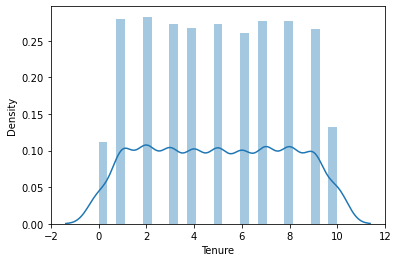

In [3]:
sns.distplot(df.Tenure)

Bivariate analysis

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='EstimatedSalary'>

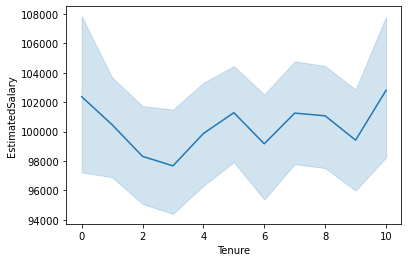

In [4]:
sns.lineplot(df.Tenure,df.EstimatedSalary)

Multivariate analysis

<AxesSubplot:>

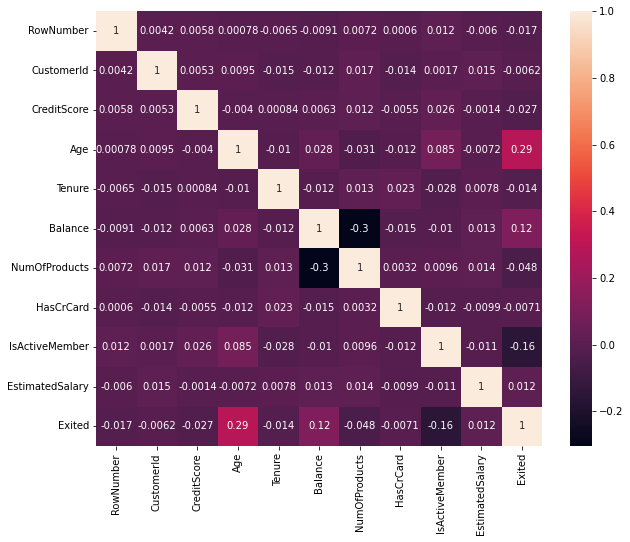

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)


Descriptive Statistics

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


To Deduct null values

In [7]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

No null values

To find outliers

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

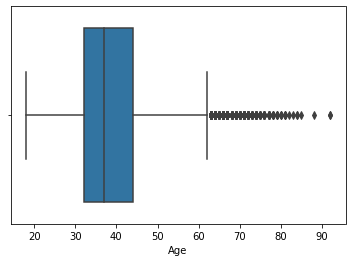

In [8]:
sns.boxplot(df.Age)

In [9]:
df.shape

(10000, 14)

Outlier Replacement

In [10]:
df.median()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11140\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [11]:
Q1= df.Age.quantile(0.25)
Q3=df.Age.quantile(0.75)

In [12]:
IQR=Q3-Q1

In [13]:
upper_limit =Q3 + 1.5*IQR
lower_limit =Q1 - 1.5*IQR

In [14]:
df['Age'] = np.where(df['Age']>upper_limit,4,df['Age'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

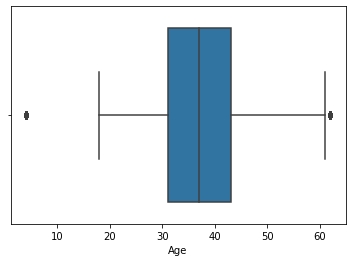

In [15]:
sns.boxplot(df.Age)

In [16]:
df.shape

(10000, 14)

Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()

In [19]:
df.Gender = le.fit_transform(df.Gender)
df.Geography = le.fit_transform(df.Geography)
df.Surname=le.fit_transform(df.Surname)

In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


X and y split

In [22]:
##Independent variables X

X=df.drop(columns=['EstimatedSalary'],axis=1)
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,0


In [23]:
##Dependent Variable y
y=df.EstimatedSalary
y.head()

0    101348.88
1    112542.58
2    113931.57
3     93826.63
4     79084.10
Name: EstimatedSalary, dtype: float64

Scaling

In [24]:
from sklearn.preprocessing import scale

In [25]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,-1.731878,-0.783213,-0.464183,-0.326221,-0.901886,-1.095988,0.507256,-1.041760,-1.225848,-0.911583,0.646092,0.970243,1.977165
1,-1.731531,-0.606534,-0.390911,-0.440036,1.515067,-1.095988,0.413690,-1.387538,0.117350,-0.911583,-1.547768,0.970243,-0.505775
2,-1.731185,-0.995885,0.628988,-1.536794,-0.901886,-1.095988,0.507256,1.032908,1.333053,2.527057,0.646092,-1.030670,1.977165
3,-1.730838,0.144767,-1.440356,0.501521,-0.901886,-1.095988,0.226559,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.505775
4,-1.730492,0.652659,0.371354,2.063884,1.515067,-1.095988,0.600821,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.505775


Train test split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_scaled,y, test_size=0.3,random_state=0)

In [27]:
X_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
7681,0.928899,-0.797032,-1.475810,-0.098592,-0.901886,0.912419,-0.334833,-1.041760,1.117213,0.807737,0.646092,0.970243,1.977165
9031,1.396553,0.714314,-1.588081,-1.133270,-0.901886,0.912419,0.226559,0.687130,-1.225848,0.807737,0.646092,-1.030670,-0.505775
3691,-0.453278,0.963450,-0.240822,-0.626278,-0.901886,-1.095988,-3.048232,-0.004426,1.354191,-0.911583,-1.547768,0.970243,-0.505775
202,-1.661903,-1.250707,-0.427547,-1.391939,1.515067,0.912419,1.255780,-0.004426,-1.225848,-0.911583,-1.547768,0.970243,1.977165
5625,0.216680,-0.385174,-1.478173,-1.474714,-0.901886,-1.095988,2.191434,0.687130,1.070229,-0.911583,0.646092,0.970243,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1.463756,-1.473777,1.385344,-0.584891,0.306591,-1.095988,-0.428399,-0.350204,0.698607,0.807737,0.646092,0.970243,-0.505775
4859,-0.048671,-0.609314,1.530707,1.484464,1.515067,-1.095988,-1.364053,-0.350204,0.608299,-0.911583,0.646092,0.970243,-0.505775
3264,-0.601195,-1.620525,-0.361366,0.905045,-0.901886,0.912419,-0.147702,-0.004426,1.358909,0.807737,0.646092,-1.030670,-0.505775
9845,1.678530,-0.374039,0.725896,-0.626278,1.515067,-1.095988,0.132994,1.378686,-1.225848,0.807737,0.646092,0.970243,-0.505775


In [28]:
X_train.shape

(7000, 13)

In [33]:
y_train

7681     55796.83
9031     19823.02
3691     13848.58
202     146145.93
5625    129562.74
          ...    
9225    162961.79
4859    107753.07
3264    181429.87
9845    148750.16
2732    118855.26
Name: EstimatedSalary, Length: 7000, dtype: float64

In [35]:
y_train.shape

(7000,)

In [30]:
X_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
9394,1.522299,-1.045250,1.398344,-0.553850,0.306591,-1.095988,-0.147702,1.032908,0.875323,-0.911583,0.646092,0.970243,-0.505775
898,-1.420801,-0.503813,-0.782089,-1.319512,-0.901886,-1.095988,0.320125,-1.041760,0.424422,-0.911583,0.646092,-1.030670,1.977165
2398,-0.901186,-0.793292,0.412717,0.573948,1.515067,-1.095988,0.507256,1.032908,0.302927,-0.911583,0.646092,0.970243,-0.505775
5906,0.314021,0.760190,1.590979,1.422384,-0.901886,0.912419,-0.428399,-0.350204,0.570464,-0.911583,-1.547768,-1.030670,-0.505775
2343,-0.920239,1.042107,-0.603636,0.573948,0.306591,0.912419,0.132994,-0.004426,1.387129,0.807737,0.646092,0.970243,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,-0.344851,0.661806,-0.626091,-1.247084,1.515067,-1.095988,0.413690,-0.350204,-1.225848,0.807737,-1.547768,0.970243,-0.505775
7375,0.822897,-0.723866,-1.266630,-0.119286,-0.901886,0.912419,-3.048232,0.341352,0.071162,0.807737,0.646092,0.970243,-0.505775
9307,1.492162,-0.146464,0.686897,0.356666,-0.901886,0.912419,0.320125,-1.041760,1.466728,0.807737,0.646092,0.970243,-0.505775
8394,1.175889,-1.292287,-1.384811,0.429093,-0.901886,0.912419,-3.048232,1.724464,1.257616,-0.911583,0.646092,0.970243,-0.505775


In [36]:
X_test.shape

(3000, 13)

In [37]:
y_test

9394    192852.67
898     128702.10
2398     75732.25
5906     89368.59
2343    135662.17
          ...    
4004    147606.71
7375     55829.25
9307    167400.29
8394     70849.47
5233     33759.41
Name: EstimatedSalary, Length: 3000, dtype: float64

In [38]:
y_test.shape

(3000,)